## Load Packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## import data

In [2]:
df_SNP = pd.read_csv ("matrix_1kg.txt",sep='\t')
df_SNP

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
0,chr21,14347281,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,chr21,14003813,T,C,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,chr21,39261634,T,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,chr21,17793478,A,G,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,chr21,35934376,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,chr21,28142462,A,C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,chr21,17061272,C,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,chr21,43768467,C,A,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,chr21,36334991,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# add a column for allele frequency
allele_freq=df_SNP.iloc[:,4:].sum(axis=1)/len(df_SNP.iloc[1,4:])
allele_freq

0       0.000785
1       0.038462
2       0.006672
3       0.004317
4       0.000785
          ...   
9995    0.041209
9996    0.000392
9997    0.002747
9998    0.057692
9999    0.005102
Length: 10000, dtype: float64

In [4]:
#extract SNP with allele frequency between 0.05 and 0.95
roi_df=df_SNP[(allele_freq <=0.95)& (allele_freq>=0.05)]
roi_df
# Be careful to use the () before and after&

,CHROM,POS,REF,ALT,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,chr21,26683267,T,G,0,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
37,chr21,28821553,G,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,chr21,34522570,A,T,0,1,2,1,1,1,...,0,1,0,1,1,1,1,2,0,1
41,chr21,41704121,A,G,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,chr21,29502200,G,T,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,chr21,18393571,A,G,0,1,0,0,0,1,...,0,0,0,1,1,2,0,1,1,1
9959,chr21,42683839,C,T,1,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9974,chr21,38472865,C,G,0,1,1,0,0,1,...,0,1,0,0,0,1,1,0,0,0
9980,chr21,30950713,A,C,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## PCA based on common variation

In [7]:
pca_input=roi_df.iloc[:,4:]
pca_input



# pca_input_standardized = StandardScaler().fit_transform(pca_input)


,HG00096,HG00097,HG00099,HG00100,HG00101,HG00102,HG00103,HG00104,HG00105,HG00106,...,NA21128,NA21129,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144
20,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,1,2,1,1,1,1,1,1,0,...,0,1,0,1,1,1,1,2,0,1
41,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,0,1,0,0,0,1,0,1,0,0,...,0,0,0,1,1,2,0,1,1,1
9959,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9974,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
9980,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#transpose the database
pca_input = pca_input.T
pca_input

,20,37,38,41,46,54,57,66,77,93,...,9888,9894,9904,9908,9913,9927,9959,9974,9980,9998
HG00096,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
HG00097,1,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
HG00099,1,0,2,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,1,0,0
HG00100,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
HG00101,0,0,1,0,0,2,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA21137,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,1,0,0
NA21141,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
NA21142,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
NA21143,0,0,0,0,0,2,0,1,1,0,...,0,0,1,0,0,1,0,0,0,0


In [11]:
#do the standard scaling
pca_input_standardized = StandardScaler().fit_transform(pca_input)
#check the mean
pca_input_standardized.mean(axis = 0)

array([-1.56424673e-16, -1.01172777e-15,  1.11871963e-16,  4.68707578e-16,
        8.27438589e-17, -1.18865322e-16,  2.28942105e-15,  5.70536118e-16,
        1.65749152e-16,  2.45835098e-16,  2.91847481e-16, -1.71966924e-15,
        3.19036616e-15, -5.22606552e-16, -1.47396485e-15,  7.63822984e-16,
        2.23051126e-15, -1.98210539e-16,  5.13979231e-16,  1.90010226e-15,
        3.07794955e-16,  1.41814870e-15,  2.18210240e-16,  1.21828241e-16,
       -2.11726677e-15, -3.32805473e-16, -1.36189682e-15, -3.84264398e-16,
        1.92110413e-16,  2.84091606e-16, -3.47184343e-16,  2.08206032e-15,
       -4.99861795e-16, -1.89713934e-15, -4.65701087e-16, -1.42045803e-16,
       -8.84583702e-16,  2.96379004e-16,  3.13546503e-16, -2.23621923e-15,
       -6.62038016e-16,  2.15839905e-15, -1.99674570e-15, -2.44266494e-16,
       -5.92017278e-16,  1.59069513e-15, -3.25398177e-16, -9.36957646e-16,
       -7.13496940e-16,  3.40866355e-16,  1.24965449e-16,  2.07622163e-17,
        4.61518143e-16, -

In [12]:
# check the variance
pca_input_standardized.var(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [13]:
# do pca
pca = PCA(n_components = 10)
pca_output = pca.fit_transform(pca_input_standardized)
pca_output

array([[-6.62155502, -9.01305114, -0.13114725, ...,  0.39434594,
         0.54733265,  2.07141293],
       [-6.25245932, -8.48463307,  1.97182918, ...,  0.27931812,
        -2.42470489,  0.59544055],
       [-6.20196351, -7.49404126,  0.30629372, ..., -1.04555427,
         0.22343103,  1.36509681],
       ...,
       [-4.66857746, -2.81535329, -2.91266523, ..., -1.49652312,
         2.88575139, -0.52817596],
       [-6.38786618, -2.88337649, -4.37162579, ...,  1.19001243,
        -0.11564388,  0.21255675],
       [-5.15728886, -0.26905031, -5.86043588, ..., -2.39978499,
        -0.01898595, -0.18473365]])

In [14]:
#check if the data points number is correct
pca_output.shape

(2548, 10)

In [15]:
pca_output_df = pd.DataFrame(data = pca_output,
                            columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
pca_output_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-6.621555,-9.013051,-0.131147,-4.712819,0.024507,0.520497,-2.341215,0.394346,0.547333,2.071413
1,-6.252459,-8.484633,1.971829,-3.434821,1.390546,-0.239045,-1.784009,0.279318,-2.424705,0.595441
2,-6.201964,-7.494041,0.306294,-4.847739,0.341067,0.215699,-0.379657,-1.045554,0.223431,1.365097
3,-5.065617,-5.671574,1.864105,-3.444551,2.434708,-1.479635,0.470929,-1.740048,0.338289,1.030937
4,-6.760246,-8.923752,2.379672,-2.822917,-2.611166,1.025677,-0.943495,-0.375710,-1.677222,-0.091089
...,...,...,...,...,...,...,...,...,...,...
2543,-6.466132,0.340684,-2.581093,4.261578,-0.356822,-1.846417,-2.194438,1.786172,4.158039,-1.106931
2544,-6.594330,-2.616532,-5.129340,3.106209,1.935127,-0.090347,-1.669490,0.520381,-0.603015,-2.463431
2545,-4.668577,-2.815353,-2.912665,3.293244,0.635901,-1.000064,0.075557,-1.496523,2.885751,-0.528176
2546,-6.387866,-2.883376,-4.371626,3.201462,-2.800118,2.711675,-0.291773,1.190012,-0.115644,0.212557


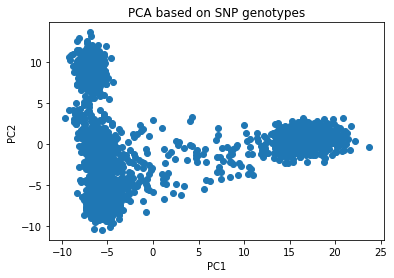

In [18]:
fig, ax = plt.subplots()
ax.scatter(x = pca_output_df['PC1'], y = pca_output_df['PC2'])
plt.title('PCA based on SNP genotypes')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()